In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
input_m0=pd.read_csv('入力応答のm0_1峰.csv', engine='python',header=None)
input_m0=np.array(input_m0.values)#m0,m1,m0,m1,,,
print(np.shape(input_m0))
output_m0=pd.read_csv('再現応答m0.csv', engine='python',header=None)
output_m0=np.array(output_m0.values)#m0,海象パラメーター
print(np.shape(output_m0))
parameters=pd.read_csv('入力応答と推定結果.csv', engine='python',header=None)
parameters=np.array(parameters.values[:,16*71:])#16*71+正解5パラ+推定5パラ
print(np.shape(parameters))

(14000, 8)
(14000, 9)
(14000, 11)


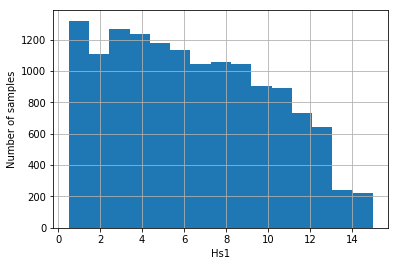

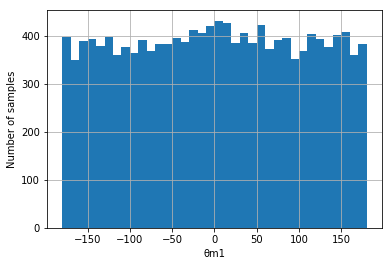

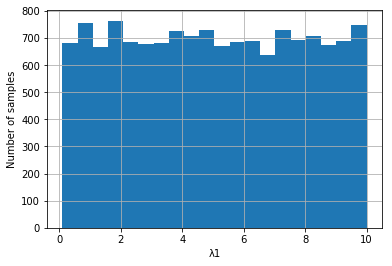

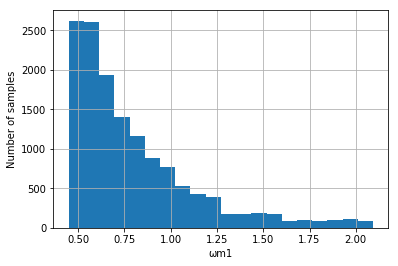

In [20]:
plt.hist(parameters[:,0],bins=15)
plt.xlabel('Hs1')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

plt.hist(np.arctan2(parameters[:,2],parameters[:,1])*180/np.pi,bins=36)
plt.xlabel('θm1')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

plt.hist(parameters[:,3],bins=20)
plt.xlabel('λ1')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

plt.hist(parameters[:,4],bins=20)
plt.xlabel('ωm1')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

### 波向き推定誤差

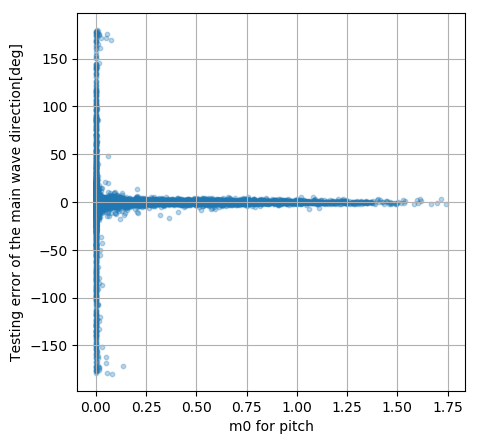

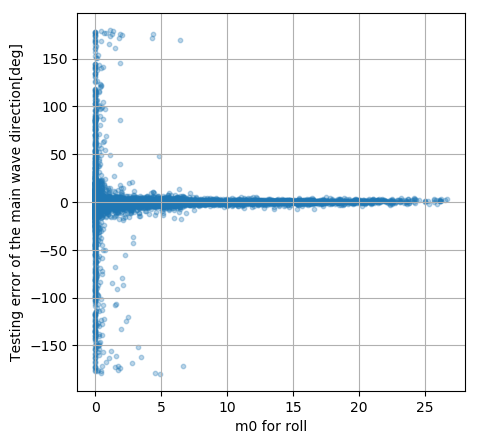

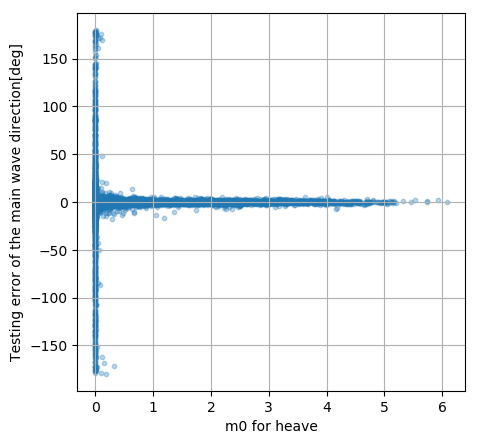

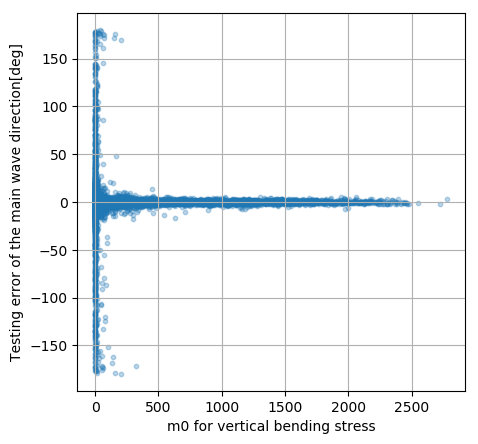

In [37]:
sin_est=np.array(parameters[:,7])
cos_est=np.array(parameters[:,6])
sin_tar=np.array(parameters[:,2])
cos_tar=np.array(parameters[:,1])
a=[-theta_diff if np.abs(theta_diff) <=180 else np.abs(theta_diff)/(theta_diff)*(360-np.abs(theta_diff)) for theta_diff in (np.arctan2(sin_est,cos_est)-np.arctan2(sin_tar,cos_tar))*180/np.pi]

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,0],a,s=10, alpha=0.3)
plt.xlabel('m0 for pitch')
plt.ylabel('Testing error of the main wave direction[deg]')
#plt.ylim(-2,2)
plt.grid()
plt.show()

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,2],a,s=10, alpha=0.3)
plt.xlabel('m0 for roll')
plt.ylabel('Testing error of the main wave direction[deg]')
#plt.ylim(-2,2)
plt.grid()
plt.show()

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,4],a,s=10, alpha=0.3)
plt.xlabel('m0 for heave')
plt.ylabel('Testing error of the main wave direction[deg]')
#plt.ylim(-2,2)
plt.grid()
plt.show()

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,6],a,s=10, alpha=0.3)
plt.xlabel('m0 for vertical bending stress')
plt.ylabel('Testing error of the main wave direction[deg]')
#plt.ylim(-2,2)
plt.grid()
plt.show()

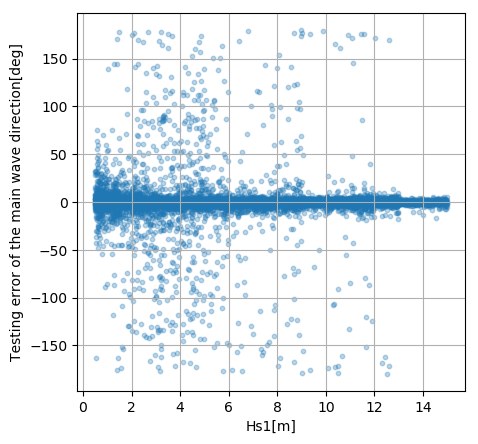

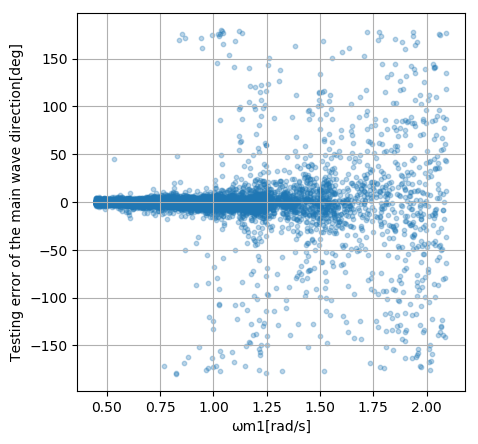

In [41]:
plt.figure(figsize=(5,5), dpi=100)
plt.scatter(parameters[:,0],a,s=10, alpha=0.3)
plt.xlabel('Hs1[m]')
plt.ylabel('Testing error of the main wave direction[deg]')
#plt.ylim(-2,2)
plt.grid()
plt.show()

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(parameters[:,4],a,s=10, alpha=0.3)
plt.xlabel('ωm1[rad/s]')
plt.ylabel('Testing error of the main wave direction[deg]')
#plt.ylim(-2,2)
plt.grid()
plt.show()

### 各パラメーターの推定誤差のヒストグラム

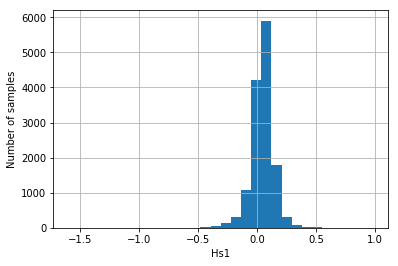

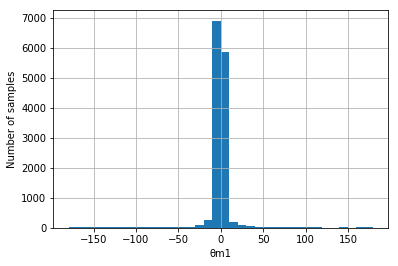

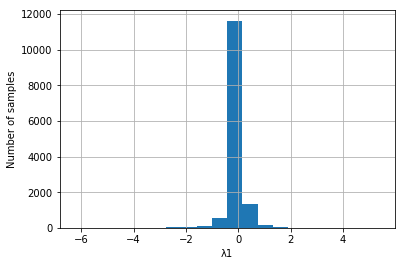

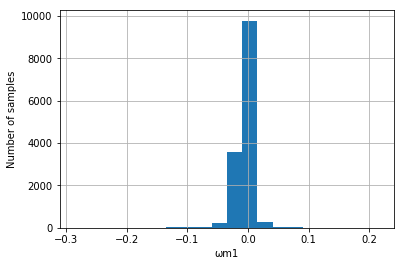

In [43]:
plt.hist(parameters[:,5]-parameters[:,0],bins=30)
plt.xlabel('Hs1')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

plt.hist(a,bins=36)
plt.xlabel('θm1')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

plt.hist(parameters[:,8]-parameters[:,3],bins=20)
plt.xlabel('λ1')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

plt.hist(parameters[:,9]-parameters[:,4],bins=20)
plt.xlabel('ωm1')
plt.ylabel('Number of samples')
plt.grid()
plt.show()

## 入力応答のm0と再現応答のm0比較

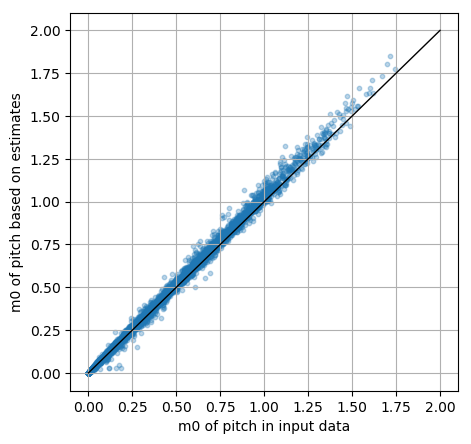

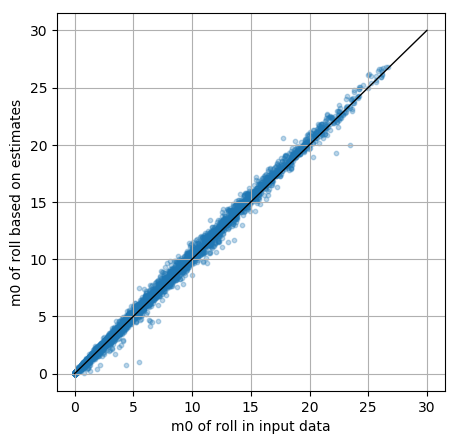

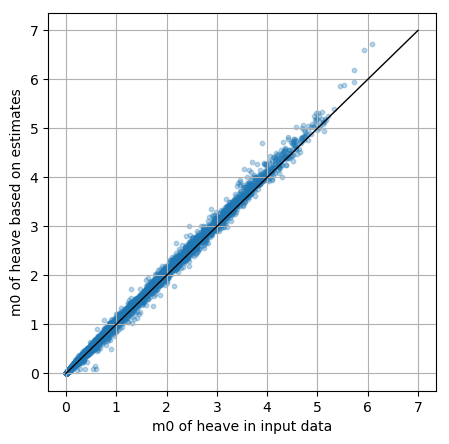

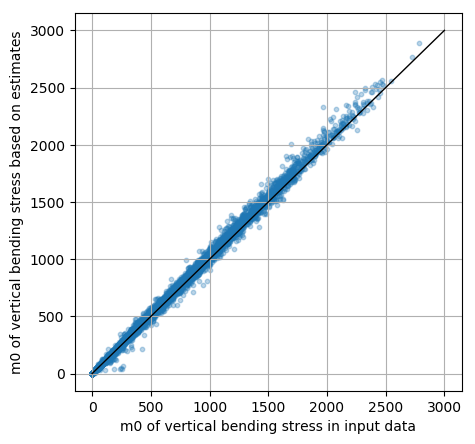

In [60]:
plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,0],output_m0[:,0],s=10, alpha=0.3)
plt.plot([0,2],[0,2],color='black',linewidth=1)
plt.xlabel('m0 of pitch in input data')
plt.ylabel('m0 of pitch based on estimates')
#plt.ylim(-2,2)
plt.grid()
plt.show()

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,2],output_m0[:,1],s=10, alpha=0.3)
plt.plot([0,30],[0,30],color='black',linewidth=1)
plt.xlabel('m0 of roll in input data')
plt.ylabel('m0 of roll based on estimates')
#plt.ylim(-2,2)
plt.grid()
plt.show()

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,4],output_m0[:,2],s=10, alpha=0.3)
plt.plot([0,7],[0,7],color='black',linewidth=1)
plt.xlabel('m0 of heave in input data')
plt.ylabel('m0 of heave based on estimates')
#plt.ylim(-2,2)
plt.grid()
plt.show()

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(input_m0[:,6],output_m0[:,3],s=10, alpha=0.3)
plt.plot([0,3000],[0,3000],color='black',linewidth=1)
plt.xlabel('m0 of vertical bending stress in input data')
plt.ylabel('m0 of vertical bending stress based on estimates')
#plt.ylim(-2,2)
plt.grid()
plt.show()